In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.datasets import mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
sgd = tf.keras.optimizers.legacy.SGD(learning_rate=0.01, momentum=0.9, nesterov=True, decay=1e-6)
adam = Adam(learning_rate=0.001)
rmsprop = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.001, decay=1e-6)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=rmsprop, metrics=['accuracy'])

model_sgd = model
history_sgd = model_sgd.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

model_adam = model
history_adam = model_adam.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

model_rmsprop = model
history_rmsprop = model_rmsprop.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))


score_sgd = model_sgd.evaluate(x_test, y_test, verbose=0)
score_adam = model_adam.evaluate(x_test, y_test, verbose=0)
score_rmsprop = model_rmsprop.evaluate(x_test, y_test, verbose=0)

print("SGD Test Loss:", score_sgd[0])
print('SGD Test accuracy:', score_sgd[1])

print("Adam Test Loss:", score_adam[0])
print('Adam Test accuracy:', score_adam[1])

print("RMSprop Test Loss:", score_rmsprop[0])
print('RMSprop Test accuracy:', score_rmsprop[1])




Epoch 1/5


2023-03-25 06:57:56.416799: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


469/469 [==============================] - 14s 11ms/step - loss: 0.2332 - accuracy: 0.9268 - val_loss: 0.0368 - val_accuracy: 0.9878
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0683 - accuracy: 0.9793 - val_loss: 0.0285 - val_accuracy: 0.9899
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0513 - accuracy: 0.9846 - val_loss: 0.0237 - val_accuracy: 0.9915
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0419 - accuracy: 0.9868 - val_loss: 0.0214 - val_accuracy: 0.9928
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0374 - accuracy: 0.9888 - val_loss: 0.0254 - val_accuracy: 0.9922
Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0326 - accuracy: 0.9903 - val_loss: 0.0183 - val_accuracy: 0.9934
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0296 - accuracy: 0.9915 - val_loss: 0.0186 - val_accuracy: 0.9947
Epoch 3/5
469/469 [

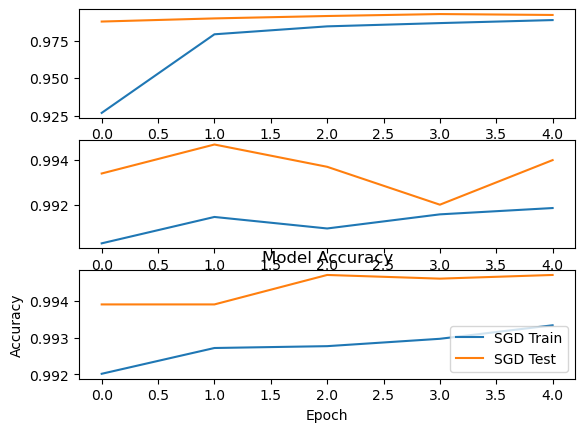

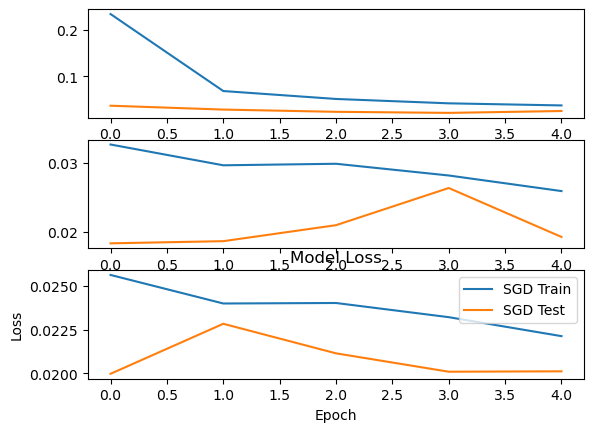

In [7]:
import matplotlib.pyplot as plt

plt.subplot(3,1,1)
plt.plot(history_sgd.history['accuracy'])
plt.plot(history_sgd.history['val_accuracy'])
plt.subplot(3,1,2)
plt.plot(history_adam.history['accuracy'])
plt.plot(history_adam.history['val_accuracy'])
plt.subplot(3,1,3)
plt.plot(history_rmsprop.history['accuracy'])
plt.plot(history_rmsprop.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['SGD Train', 'SGD Test', 'Adam Train', 'Adam Test', 'RMSprop Train', 'RMSprop Test'], loc='lower right')
plt.show()

plt.subplot(3,1,1)
plt.plot(history_sgd.history['loss'])
plt.plot(history_sgd.history['val_loss'])
plt.subplot(3,1,2)
plt.plot(history_adam.history['loss'])
plt.plot(history_adam.history['val_loss'])
plt.subplot(3,1,3)
plt.plot(history_rmsprop.history['loss'])
plt.plot(history_rmsprop.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['SGD Train', 'SGD Test', 'Adam Train', 'Adam Test', 'RMSprop Train', 'RMSprop Test'], loc='upper right')
plt.show()